In [21]:
import numpy as np
import matplotlib.pyplot as plt

class data_storage:
    b = np.array([]);
    l = np.array([]);
    t = np.array([]);
    v = np.array([]);
    d = np.array([]);
    g = np.array([]);
    s = np.array([]);

def extract_data( TXTpath ):
    X = data_storage()
    Cb = 0;
    Ct = 0;
    with open(TXTpath) as f:
        line = f.readline()
        while line:
            line = f.readline()
            if( line[0:2] == ".b" ):
                Cb+=1;
                X.b = np.append(X.b, int(line[2:]))
            if( line[0:2] == ".g" ):
                X.g = np.append(X.g, int(line[3:]))        
            if( line[0:2] == ".s" ):
                X.s = np.append(X.s, int(line[3:]))
            if( line[0:2] == ".d" ):
                X.d = np.append(X.d, int(line[3:]))
    return X
    


X0 = extract_data( 'V1/v1.txt' )
X1 = extract_data( 'V2/v2.txt' )
X2 = extract_data( 'V3/v3.txt' )


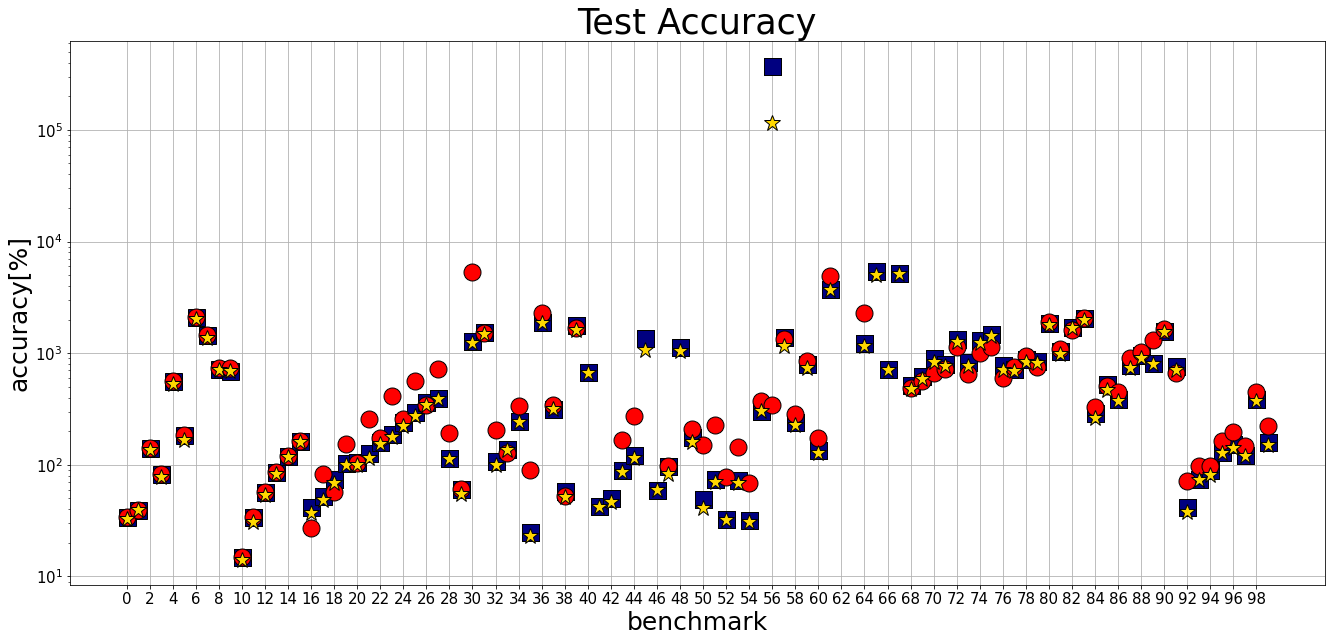

In [24]:
fig = plt.figure(figsize=(22.5,10))
ax = plt.gca()
plt.xticks(range(0,99,2))
plt.grid()
line0, = ax.semilogy(X0.b, X0.g , 's', c='#000080', alpha=1, markeredgecolor='k', markersize = 17, label = 'trivial')
line1, = ax.semilogy(X1.b, X1.g , 'o', c='red', alpha=1, markeredgecolor='k', markersize = 17, label = 'precomputation')
line2, = ax.semilogy(X2.b, X2.g , '*', c='gold', alpha=1, markeredgecolor='k', markersize = 17, label = 'cut rewriting')


#ax.legend( handles = [lineB,lineA, line0, line1, line4, line2, line5, line3], fontsize=20,
#           bbox_to_anchor = (1, 0.9))
plt.xlabel('benchmark', fontsize=25)
plt.ylabel('accuracy[%]', fontsize=25)
plt.title('Test Accuracy', fontsize=35)
ax.tick_params(axis='both', which='major', labelsize=15)

In [31]:
from tabulate import tabulate
def extract_row_data( X, label ):
    return [label, np.mean(X.g), np.mean(X.s), np.mean(X.d)]

row0 = extract_row_data( X0, "trivial")
#row1 = extract_row_data( X1, "precomputation")
row2 = extract_row_data( X2, "cut rewriting")

#row2 = ["I-DSD",np.mean(t2), np.mean(g2), np.mean(s2), np.mean(d2), np.mean(np.abs(t2-v2))];
table = [ row0, row1, row2 ] #row2
print(tabulate(table, headers = ["method","gates","size","levels"], tablefmt="github"))

| method         |    gates |     size |   levels |
|----------------|----------|----------|----------|
| trivial        | 4685.74  | 4697.56  | 106.79   |
| precomputation |  654.124 |  665.753 | 109.045  |
| cut rewriting  | 1807.99  | 1819.71  |  96.3673 |


In [30]:
print(X1.b)
        

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 43. 44. 47. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59.
 60. 61. 64. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.
 83. 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
